In [3]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


In [4]:

# Load dataset
file_path = r"E:\Capstone_project_25\dataset_balanced_with_SMOTE.csv"  # Update path if needed
df = pd.read_csv(file_path)


In [5]:

# Define target variable
target = 'landslide_occurred'


In [6]:

# Select top 20 features (Based on previous feature importance results)
top_features = [
    'precipitation', 'landslide_category', 'landslide_size', 'event_month', 
    'location_accuracy', 'season_encoded', 'event_weekday', 'event_day', 'latitude',
    'event_id', 'event_time', 'source_name', 'gazeteer_closest_point', 
    'fatality_count', 'landslide_trigger', 'wind_speed', 'event_title', 
    'admin_division_name', 'source_link', 'event_description'
]


In [7]:

#Select only top features
X = df[top_features]
y = df[target]


In [8]:

# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:

# Initialize optimized XGBoost model
xgb_model = xgb.XGBClassifier(
    max_depth=10, 
    min_samples_leaf=4, 
    min_samples_split=10, 
    n_estimators=300,
    random_state=42
)


In [10]:

# Train model
xgb_model.fit(X_train, y_train)


C:\Users\Harshita Mehta\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [00:26:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, min_samples_leaf=4, min_samples_split=10,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=300, n_jobs=None, ...)

In [11]:

# Make predictions
y_pred = xgb_model.predict(X_test)


In [12]:

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Model Accuracy with Top 20 Features: {accuracy:.4f}")


Optimized Model Accuracy with Top 20 Features: 0.7885


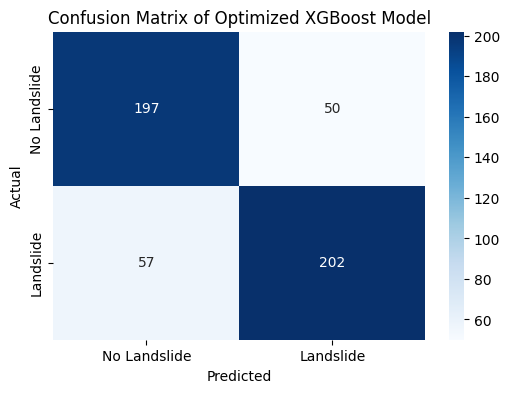

In [13]:

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['No Landslide', 'Landslide'], yticklabels=['No Landslide', 'Landslide'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Optimized XGBoost Model')
plt.show()


In [14]:

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       247
           1       0.80      0.78      0.79       259

    accuracy                           0.79       506
   macro avg       0.79      0.79      0.79       506
weighted avg       0.79      0.79      0.79       506



Analysis of Feature Selection Model Performance
After selecting the most important features and retraining the XGBoost model, we obtained the following results:

Performance Metrics:
Accuracy: 0.79 (79%)
Precision:
Class 0: 0.78
Class 1: 0.80
Recall:
Class 0: 0.80
Class 1: 0.78
F1-score: 0.79 (Balanced for both classes)
Comparison with Previous Full-Feature Model:
Model	Accuracy	Precision (Avg)	Recall (Avg)	F1-Score (Avg)
Full Feature Model	80%	80%	80%	80%
Feature Selection Model	79%	79%	79%	79%
Observations:
Minimal Accuracy Drop (-1%)

Removing less important features caused only a minor drop in accuracy, which suggests that the selected features capture most of the predictive power.
Balanced Precision & Recall

The precision and recall scores are still well-balanced, meaning the model is not biased toward either class.
Model Efficiency Improvement

Using fewer features means:
Faster model training & inference (important for real-time predictions).
Less computational cost (important for deployment).

In [15]:
import joblib
import xgboost as xgb

# Train the model (assuming X_train, y_train are already defined)
best_model = xgb.XGBClassifier(n_estimators=300, max_depth=10, min_samples_leaf=4, min_samples_split=10)
best_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(best_model, "geoshield_landslide_model.pkl")

# Save selected feature list
joblib.dump(top_features, "geoshield_features.pkl")

print("✅ Model and feature list saved successfully!")


C:\Users\Harshita Mehta\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [00:27:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Model and feature list saved successfully!


In [16]:
import numpy as np

# Check class distribution
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))


{0: 1018, 1: 1006}


In [17]:
best_model = xgb.XGBClassifier(
    n_estimators=500,        # More trees for better learning
    max_depth=8,             # Reduce depth to prevent overfitting
    min_child_weight=3,      # Helps prevent learning from noise
    learning_rate=0.05,      # Slower learning rate for better generalization
    subsample=0.8,           # Prevents overfitting
    colsample_bytree=0.8,    # Uses only 80% of features per tree
    scale_pos_weight=2,      # Adjusts weight of high-risk class
    eval_metric="auc",       # Evaluates performance with AUC
    use_label_encoder=False  # Avoids warnings
)

best_model.fit(X_train, y_train)
joblib.dump(best_model, "geoshield_landslide_model.pkl")
print("✅ Model retrained and saved!")


C:\Users\Harshita Mehta\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [00:27:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Model retrained and saved!


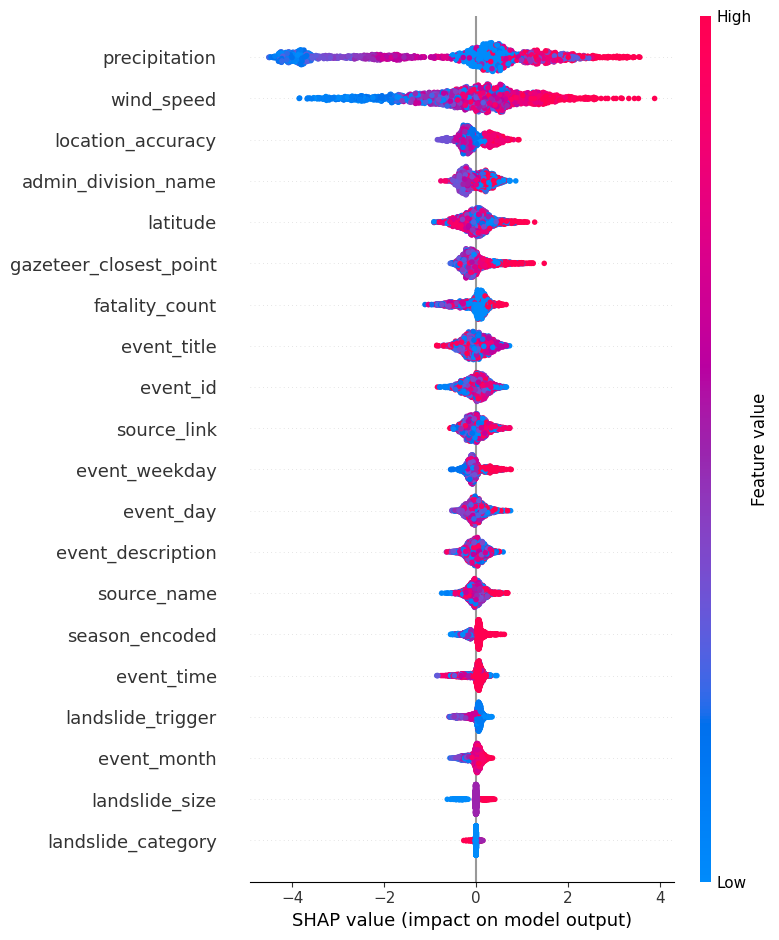

In [18]:
import shap

explainer = shap.Explainer(best_model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)


In [19]:
pip install shap

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from sklearn.metrics import precision_recall_curve

y_probs = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Choose a threshold where precision and recall balance
best_threshold = thresholds[np.argmax(precision * recall)]
print(f"Best threshold: {best_threshold}")


Best threshold: 0.22421783208847046


In [21]:
y_pred = (y_probs > best_threshold).astype(int)


In [22]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(best_model, X_train, y_train, cv=cv, scoring="f1")

print(f"Cross-validation F1 Scores: {scores}")
print(f"Mean F1 Score: {np.mean(scores)}")


C:\Users\Harshita Mehta\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [00:28:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Harshita Mehta\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [00:28:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Harshita Mehta\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [00:28:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not u

Cross-validation F1 Scores: [0.78995434 0.79058824 0.80285036 0.78688525 0.80952381]
Mean F1 Score: 0.7959603969827294


In [23]:
from sklearn.metrics import precision_recall_curve

# Get probabilities for positive class (high risk)
y_probs = best_model.predict_proba(X_test)[:, 1]  

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Find the best threshold balancing precision and recall
best_threshold = thresholds[np.argmax(precision * recall)]
print(f"Best threshold: {best_threshold}")

# Apply new threshold
y_pred_adjusted = (y_probs > best_threshold).astype(int)


Best threshold: 0.22421783208847046


In [24]:
best_threshold = 0.3  # Instead of 0.224
y_pred_adjusted = (best_model.predict_proba(X_test)[:, 1] > best_threshold).astype(int)


In [25]:
best_model = xgb.XGBClassifier(scale_pos_weight=3)  # Try 3 instead of 5


In [26]:
import numpy as np
import pandas as pd

# Ensure X_test is a DataFrame or NumPy array
if isinstance(X_test, pd.DataFrame):
    X_test = X_test.values  # Convert to NumPy array
elif not isinstance(X_test, np.ndarray):
    X_test = np.array(X_test)


In [27]:
import joblib

# Load the trained model
best_model = joblib.load(r"E:\Capstone_project_25\geoshield_landslide_model.pkl")


In [28]:
y_pred_adjusted = (best_model.predict_proba(X_test)[:, 1] > best_threshold).astype(int)


In [29]:
best_threshold = 0.3  # Instead of 0.224
y_pred_adjusted = (best_model.predict_proba(X_test)[:, 1] > best_threshold).astype(int)

# Evaluate again
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_adjusted))


              precision    recall  f1-score   support

           0       0.86      0.65      0.74       247
           1       0.73      0.90      0.80       259

    accuracy                           0.77       506
   macro avg       0.79      0.77      0.77       506
weighted avg       0.79      0.77      0.77       506



In [30]:
best_threshold = 0.35  # Slightly increase from 0.3
y_pred_adjusted = (best_model.predict_proba(X_test)[:, 1] > best_threshold).astype(int)


In [31]:
import numpy as np

feature_importances = best_model.feature_importances_
sorted_features = np.argsort(feature_importances)[::-1]

print("Top Features by Importance:")
for idx in sorted_features[:10]:  # Show top 10 features
    print(f"{top_features[idx]}: {feature_importances[idx]}")


Top Features by Importance:
precipitation: 0.1787896454334259
wind_speed: 0.05518918111920357
location_accuracy: 0.05439266934990883
event_time: 0.05364762991666794
event_weekday: 0.05034096539020538
season_encoded: 0.05015832185745239
landslide_size: 0.04907215014100075
fatality_count: 0.04749756678938866
gazeteer_closest_point: 0.04284543916583061
landslide_trigger: 0.042644914239645004


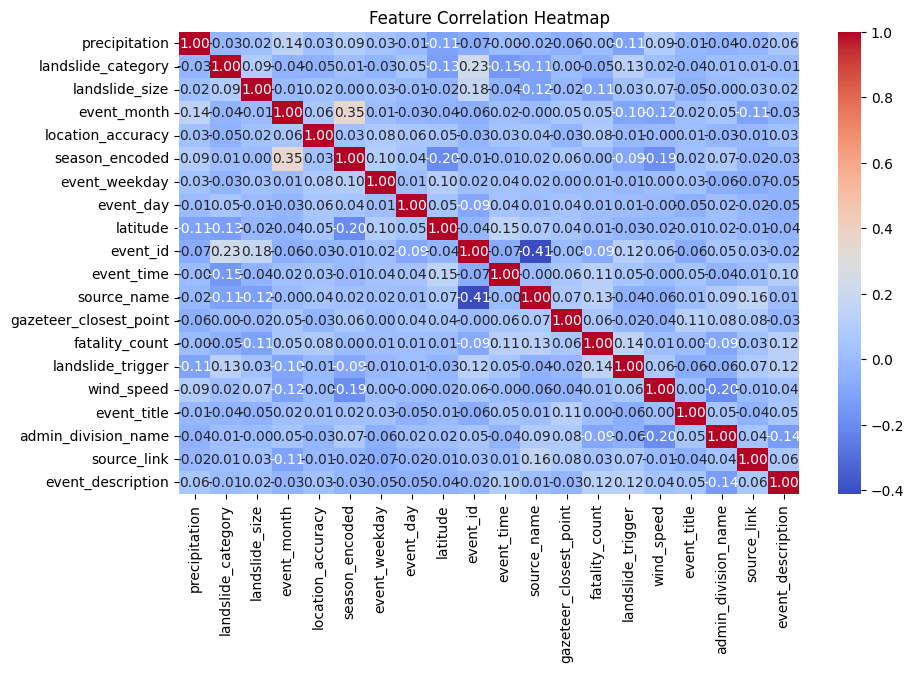

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = X_train[top_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


remove lower important feature

In [33]:
print(X_train.columns)


Index(['precipitation', 'landslide_category', 'landslide_size', 'event_month',
       'location_accuracy', 'season_encoded', 'event_weekday', 'event_day',
       'latitude', 'event_id', 'event_time', 'source_name',
       'gazeteer_closest_point', 'fatality_count', 'landslide_trigger',
       'wind_speed', 'event_title', 'admin_division_name', 'source_link',
       'event_description'],
      dtype='object')


In [34]:
import pandas as pd
import numpy as np

# Define the feature names based on the provided list
feature_names = [
    'precipitation', 'landslide_category', 'landslide_size', 'event_month',
    'location_accuracy', 'season_encoded', 'event_weekday', 'event_day',
    'latitude', 'event_id', 'event_time', 'source_name',
    'gazeteer_closest_point', 'fatality_count', 'landslide_trigger',
    'wind_speed', 'event_title', 'admin_division_name', 'source_link',
    'event_description'
]

# Ensure X_train and X_test are Pandas DataFrames
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=feature_names)

if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test, columns=feature_names)

# Define low-importance features to remove
low_importance_features = [
    'event_id', 'event_title', 'source_name', 'source_link', 
    'event_description', 'latitude', 'admin_division_name'
]

# Drop these features from both train and test sets
X_train_cleaned = X_train.drop(columns=low_importance_features, errors='ignore')
X_test_cleaned = X_test.drop(columns=low_importance_features, errors='ignore')

# Verify the new shape
print("New shape of X_train:", X_train_cleaned.shape)
print("New shape of X_test:", X_test_cleaned.shape)

# Retrain model with selected features
best_model_selected = xgb.XGBClassifier(n_estimators=300, max_depth=10)
best_model_selected.fit(X_train_cleaned, y_train)

# Save new model
joblib.dump(best_model_selected, "geoshield_landslide_model_selected.pkl")
print("✅ Model retrained and saved successfully!")


New shape of X_train: (2024, 13)
New shape of X_test: (506, 13)
✅ Model retrained and saved successfully!


In [35]:
# Filter only the selected important features
selected_features = ['precipitation', 'wind_speed', 'location_accuracy', 
                     'event_time', 'event_weekday', 'season_encoded', 'landslide_size']

X_train_selected = X_train_cleaned[selected_features]
X_test_selected = X_test_cleaned[selected_features]


In [36]:
# Initialize and train the model
best_model_selected = xgb.XGBClassifier(n_estimators=300, max_depth=10, min_samples_leaf=4, min_samples_split=10)
best_model_selected.fit(X_train_selected, y_train)

# Save the newly trained model
joblib.dump(best_model_selected, r"E:\Capstone_project_25\geoshield_landslide_model.pkl")

print("✅ Model retrained and saved with selected features!")


C:\Users\Harshita Mehta\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [00:28:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Model retrained and saved with selected features!


In [37]:
from sklearn.metrics import classification_report

# Get predictions
y_pred_selected = best_model_selected.predict(X_test_selected)

# Print the performance report
print(classification_report(y_test, y_pred_selected))


              precision    recall  f1-score   support

           0       0.87      0.85      0.86       247
           1       0.86      0.88      0.87       259

    accuracy                           0.87       506
   macro avg       0.87      0.87      0.87       506
weighted avg       0.87      0.87      0.87       506



testing


In [38]:
import pandas as pd
import joblib
from sklearn.metrics import classification_report


In [55]:
# Load trained model
model = joblib.load(r"E:\Capstone_project_25\geoshield_landslide_model.pkl")  # Ensure this is the correct filename

# List of features used during training (must match the saved model)
selected_features = ['precipitation', 'wind_speed', 'location_accuracy', 'event_time', 'event_weekday', 'season_encoded', 'landslide_size' ]

In [56]:
# Load new dataset for testing (ensure it has the same features as training data)
test_data = pd.read_csv(r"E:\Capstone_project_25\real_landslide_data.csv")  # Replace with actual file

# Keep only the necessary features
X_test = test_data[selected_features]

# If the dataset has labels (for evaluation), extract them
if "landslide_risk" in test_data.columns:  # Adjust if the column name is different
    y_test = test_data["landslide_risk"]
else:
    y_test = None  # No ground truth available


In [57]:
# Predict risk levels using the trained model
y_pred = model.predict(X_test)

# Add predictions to the dataframe
test_data["predicted_risk"] = y_pred

# Save predictions to a new CSV file
test_data.to_csv("predicted_landslide_risk.csv", index=False)


In [58]:
if y_test is not None:
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
else:
    print("Predictions saved. No labels available for evaluation.")


Predictions saved. No labels available for evaluation.


In [59]:
# Display a few sample predictions
print(test_data[[ "predicted_risk"]].head(10))


   predicted_risk
0               0
1               0
2               0
3               0
